In [1]:
import tensorflow as tf

print(tf.__version__)

2.0.0-rc0


In [2]:
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True, shuffle_files=True)

In [4]:
train_data, test_data = imdb['train'], imdb['test']

training_sentences=[]
training_labels=[]

testing_sentences=[]
testing_labels=[]

In [8]:
for s, l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())

for s, l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [11]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen = max_length, truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length)

In [15]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

b i absolutely loved this movie when i was a kid i cried every time i watched it it wasn't weird to me i totally identified with the characters i would love to see it again and hope i wont be disappointed <OOV> rocks i was really drawn in to the fantasy world and to me the movie was <OOV> i wonder if i ever saw the series and have confused them the acting i thought was strong i loved jack <OOV> he was so dreamy to an 10 year old when i first saw the movie not in 1970 i can still remember the characters vividly the <OOV> was totally believable and i can still <OOV> the evil woods
b"I absolutely LOVED this movie when I was a kid. I cried every time I watched it. It wasn't weird to me. I totally identified with the characters. I would love to see it again (and hope I wont be disappointed!). Pufnstuf rocks!!!! I was really drawn in to the fantasy world. And to me the movie was loooong. I wonder if I ever saw the series and have confused them? The acting I thought was strong. I loved Jack W

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [17]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data = (testing_padded, testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/50


W0906 01:26:11.851528 140027769546560 deprecation.py:323] From /opt/tljh/user/lib/python3.6/site-packages/tensorflow_core/python/ops/nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


25000/25000 [==============================] - 37s 1ms/sample - loss: 0.5016 - accuracy: 0.7338 - val_loss: 0.3595 - val_accuracy: 0.8412
Epoch 2/50
25000/25000 [==============================] - 35s 1ms/sample - loss: 0.2991 - accuracy: 0.8788 - val_loss: 0.3481 - val_accuracy: 0.8502
Epoch 3/50
25000/25000 [==============================] - 35s 1ms/sample - loss: 0.2271 - accuracy: 0.9123 - val_loss: 0.3629 - val_accuracy: 0.8472
Epoch 4/50
25000/25000 [==============================] - 34s 1ms/sample - loss: 0.1672 - accuracy: 0.9404 - val_loss: 0.4316 - val_accuracy: 0.8377
Epoch 5/50
25000/25000 [==============================] - 34s 1ms/sample - loss: 0.1125 - accuracy: 0.9613 - val_loss: 0.5254 - val_accuracy: 0.8323
Epoch 6/50
25000/25000 [==============================] - 35s 1ms/sample - loss: 0.0775 - accuracy: 0.9740 - val_loss: 0.5856 - val_accuracy: 0.8280
Epoch 7/50
25000/25000 [==============================] - 35s 1ms/sample - loss: 0.0519 - accuracy: 0.9831 - val_loss

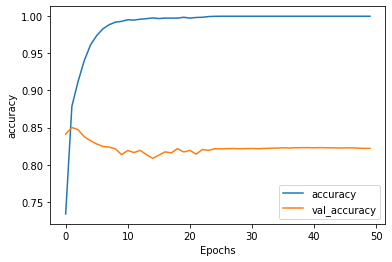

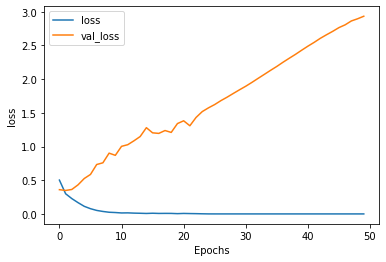

In [19]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy');
plot_graphs(history, 'loss');

In [21]:
# Model definition with LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/50
25000/25000 [==============================] - 36s 1ms/sample - loss: 0.4747 - accuracy: 0.7578 - val_loss: 0.3767 - val_accuracy: 0.8281
Epoch 2/50
25000/25000 [==============================] - 32s 1ms/sample - loss: 0.2924 - accuracy: 0.8819 - val_loss: 0.3582 - val_accuracy: 0.8446
Epoch 3/50
25000/25000 [==============================] - 32s 1ms/sample - loss: 0.2393 - accuracy: 0.9075 - val_loss: 0.3727 - val_accuracy: 0.8428
Epoch 4/50
25000/25000 [==============================] - 32s 1ms/sample - loss: 0.1984 - accuracy: 0.9251 - val_loss: 0.4983 - val_accuracy: 0.8220
Epoch 5/50
25000/25000 [==============================] - 32s 1ms/sample - loss: 0.1576 - accuracy: 0.9442 - val_loss: 0.4962 - val_accuracy: 0.8218
Epoch 6/50
25000/25000 [==============================] - 32s 1ms/sample - loss: 0.1154 - accuracy: 0.9599 - val_loss: 0.5113 - val_accuracy: 0.8255
Epoch 7/50
25000/25000 [==============================] 

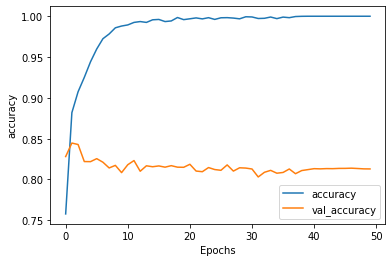

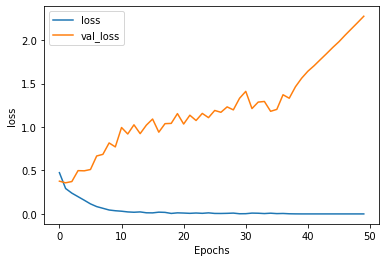

In [23]:
plot_graphs(history, 'accuracy');
plot_graphs(history, 'loss');

In [24]:
# Model Definition with Conv1D
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/50
25000/25000 [==============================] - 6s 257us/sample - loss: 0.5416 - accuracy: 0.7595 - val_loss: 0.4441 - val_accuracy: 0.8432
Epoch 2/50
25000/25000 [==============================] - 6s 227us/sample - loss: 0.3680 - accuracy: 0.8768 - val_loss: 0.4055 - val_accuracy: 0.8423
Epoch 3/50
25000/25000 [==============================] - 6s 231us/sample - loss: 0.2864 - accuracy: 0.9068 - val_loss: 0.4009 - val_accuracy: 0.8388
Epoch 4/50
25000/25000 [==============================] - 6s 230us/sample - loss: 0.2343 - accuracy: 0.9269 - val_loss: 0.4382 - val_accuracy: 0.8353
Epoch 5/50
25000/25000 [==============================] - 6s 229us/sample - loss: 0.1953 - accuracy: 0.9396 - val_loss: 0.4688 - val_accuracy: 0.8275
Epoch 6/50
25000/25000 [==============================] - 6s 231us/sample - loss: 0.1635 - accuracy: 0.9526 - val_loss: 0.5232 - val_accuracy: 0.8201
Epoch 7/50
25000/25000 [==========================

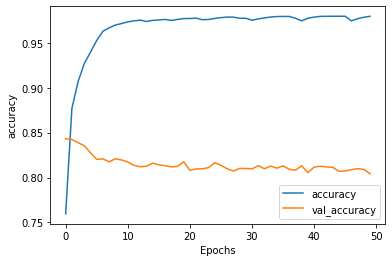

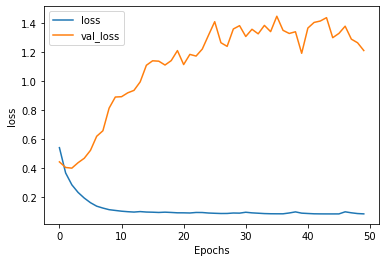

In [26]:
plot_graphs(history, 'accuracy');
plot_graphs(history, 'loss');